In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:16.3f}'.format}, linewidth=130)

In [3]:
def identity(x):
    return x

def relu(x):
    
    # One line return statement is dope!
    return np.where(x > 0, x, 0)

def l_relu(x, a = 0.01):
    
    # One line return statement is dope!
    return np.where(x > 0, x, a*x)

def natural_l_relu(x, a = 0.01, b = 1):
    return np.where(x > b, np.log(np.abs(x)), a * x)

def exp_relu(x, a = 0.6):
    return np.where(x > 0, np.power(x, a), -np.power(-x, a))

def sech(x):
    return 2 * np.exp(x)/(np.exp(2*x) + 1)

def sine(x):
    
    return np.sin(x)

def cos(x):
    
    return np.cos(x)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def exp_div(x):
    return 1/np.exp(x)

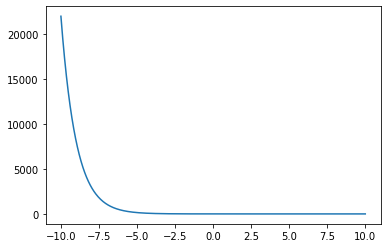

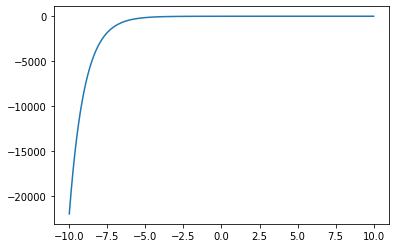

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3413561.py:18: RuntimeWarning: invalid value encountered in power
  return np.where(x > 0, np.power(x, a), -np.power(-x, a))


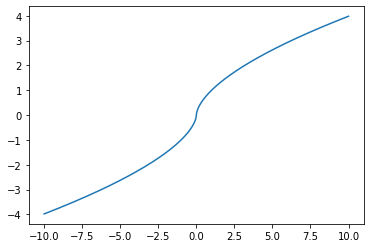

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3413561.py:18: RuntimeWarning: invalid value encountered in power
  return np.where(x > 0, np.power(x, a), -np.power(-x, a))


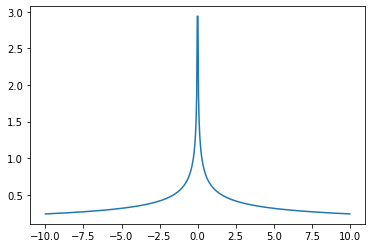

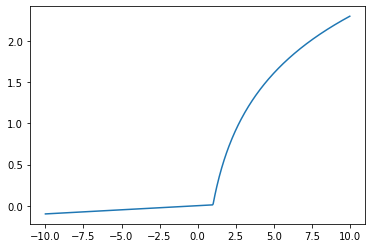

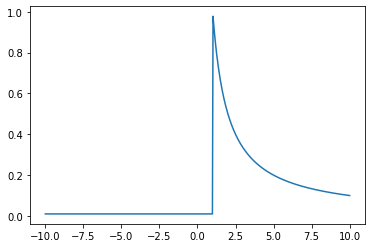

In [4]:
# Experimental: Yield the approximation of the derivative of function f at point x
def get_derivative(f, x, offset = 0.01):
    
    # Define points between which derivative is approximated
    vec1 = np.array([x - offset, f(x - offset)])
    vec2 = np.array([x + offset, f(x + offset)])
    
    # Get the vector between the two points
    sub = vec2 - vec1
    
    # Return the slope (rise over run echoes in your head)
    return sub[1]/(sub[0] + (offset * 0.001))


activation = exp_div
# Method used for mapping multiple values to the get_derivative method.
def test_approximation(x):
    return get_derivative(activation, x)
limit = 10
line = np.linspace(-limit, limit, num = 500)

plt.plot(line, list(map(activation, line)))
plt.show()
plt.plot(line, list(map(test_approximation, line)))
plt.show()

activation = exp_relu
limit = 10
line = np.linspace(-limit, limit, num = 500)

plt.plot(line, list(map(activation, line)))
plt.show()
plt.plot(line, list(map(test_approximation, line)))
plt.show()

activation = natural_l_relu
limit = 10
line = np.linspace(-limit, limit, num = 500)

plt.plot(line, list(map(activation, line)))
plt.show()
plt.plot(line, list(map(test_approximation, line)))
plt.show()

In [5]:
y_t = 10
def radial_basis_function(x, sig = 0.3):
    return np.exp(-np.power((np.abs(x - y_t) * sig), 2))

In [6]:
for i in range(10):
    y_t = i
    print(radial_basis_function(np.array([0])))

[           1.000]
[           0.914]
[           0.698]
[           0.445]
[           0.237]
[           0.105]
[           0.039]
[           0.012]
[           0.003]
[           0.001]


# Loss functions

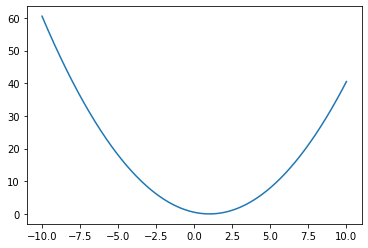

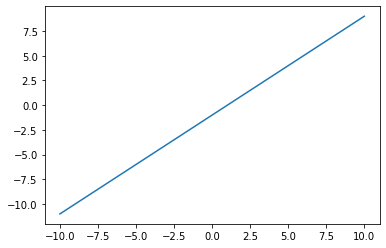

In [264]:
y_t = 3
l = 2

class MSE:
    def __init__(self):
        
        self.y_t = None
    def loss(self, y_p):

        error = np.square(y_p - self.y_t) * 1/(2 * y_p.size)
        return np.nan_to_num(error)
        
    def compute(self, y_p, y_t):
            
        self.y_t = y_t
            
        return self.loss(y_p)
    
    def derivative(self, x):
        x = x.ravel()
        return get_derivative(self.loss, x)
            
        
mse = MSE()
activation = mse.loss
mse.y_t = 1
plt.plot(line, list(map(activation, line)))
plt.show()
plt.plot(line, list(map(test_approximation, line)))
plt.show()

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\2517867295.py:47: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


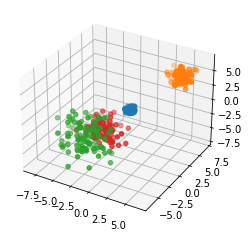

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3413561.py:18: RuntimeWarning: invalid value encountered in power
  return np.where(x > 0, np.power(x, a), -np.power(-x, a))
C:\Users\joels\AppData\Local\Temp\ipykernel_15232\2517867295.py:66: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


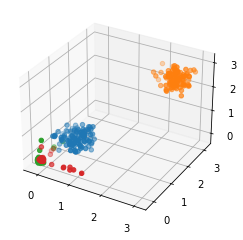

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\2517867295.py:73: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


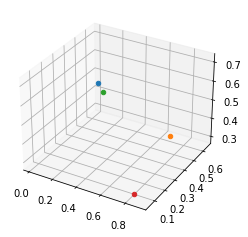

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\2517867295.py:82: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


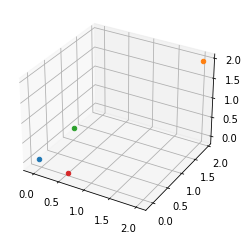

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\2517867295.py:90: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


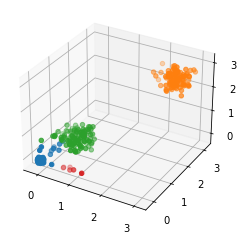

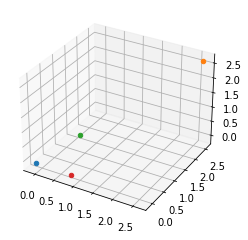

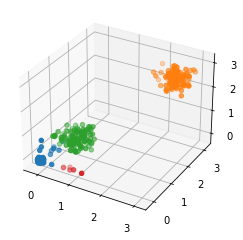

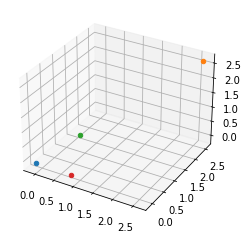

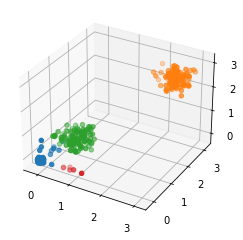

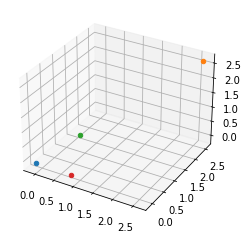

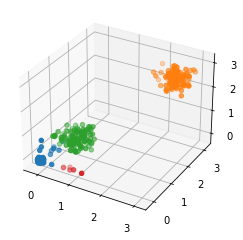

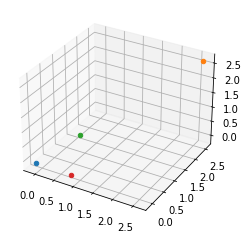

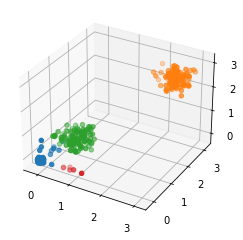

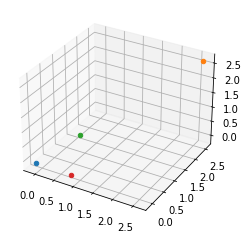

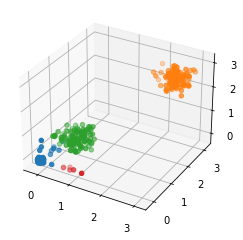

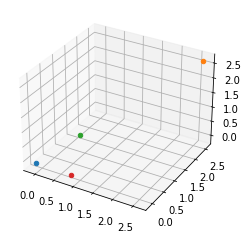

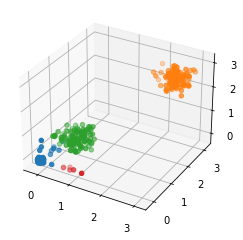

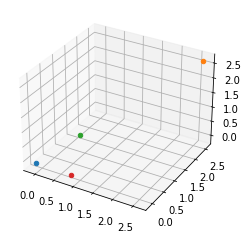

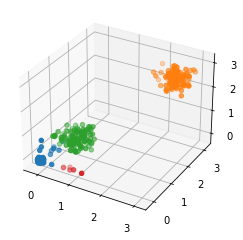

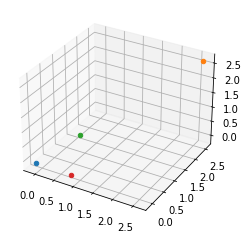

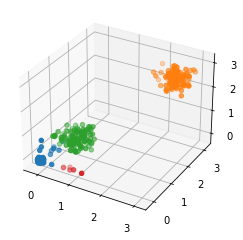

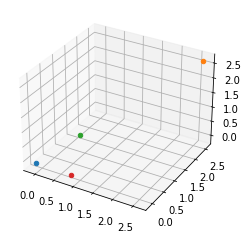

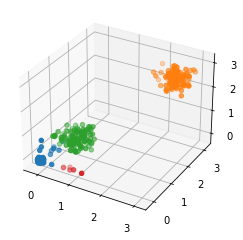

In [239]:
def k_medians(clusters, points, iters = 10, method = np.median):
    
    for i in range(iters):
        
        cluster_points = get_cluster_belonging(clusters, points)

        for c in range(len(clusters)):

            clusters[c] = method(cluster_points[c], axis = 0)
    
    return clusters

def get_cluster_belonging(clusters, points):
    cluster_points = [[] for i in range(len(clusters))]
    for e in points:

        minimum_distance = None

        cluster_dists = []

        for cluster in clusters:

            dist = np.sqrt(np.sum(np.power(cluster - e, 2)))
            #y_t = cluster
            #dist = radial_basis_function(cluster - e, sig = 10)
            #dist = np.sqrt(np.sum(np.power(dist, 2)))
            cluster_dists.append(dist)
        
        index = np.argmin(cluster_dists)

        cluster_points[index].append(e)
        
    return cluster_points

np.random.seed(0)
points = np.random.random_sample((100, 3))
points = np.vstack([points, np.random.normal(5, 0.7, size = (100, 3))])
points = np.vstack([points, np.random.normal(-3, 1.7, size = (100, 3))])
points = np.vstack([points, np.random.normal(1, 1.05, size = (100, 3))-3])

labels = np.ones(100) * 0
labels = np.hstack([labels, np.ones(100) * 1])
labels = np.hstack([labels, np.ones(100) * 2])
labels = np.hstack([labels, np.ones(100) * 3])

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in np.unique(labels):
    p = points[labels == i]
    ax.scatter(p.T[0], p.T[1], p.T[2])
plt.show()

#points = np.array(list(map(sigmoid, points)))
#points = np.array(list(map(exp_relu, points)))
points = np.array(list(map(l_relu, points)))
#points = np.array(list(map(tanh, points)))
points = np.array(list(map(exp_relu, points)))
#points = np.array(list(map(cos, points)))
#points = np.array(list(map(sine, points)))
#points = np.array(list(map(sech, points)))
#points = np.array(list(map(natural_l_relu, points)))

clusters = np.random.random_sample((4, 3))

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in np.unique(labels):
    p = points[labels == i]
    ax.scatter(p.T[0], p.T[1], p.T[2])
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

for c in clusters:
    ax.scatter(c[0], c[1], c[2])
plt.show()
    
for i in range(10):
    k_medians(clusters, points, iters = 1, method = np.mean)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for c in clusters:
        ax.scatter(c[0], c[1], c[2])
    plt.show()


    point_array = get_cluster_belonging(clusters, points)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for c in point_array:
        if len(c) > 0:
            ax.scatter(np.array(c).T[0], np.array(c).T[1], np.array(c).T[2])
    plt.show()


# Layer classes


In [324]:
# Super class of layers
class Layer():
    
    def __init__(self, size = None, W = None, activation = None, trainable = None, rate = 0.4, a = 0, standardize = False, iters = 0):
        
        self.size = size
        self.W = W
        self.activation = activation
        self.trainable = trainable
        self.rate = rate
        self.a = a
        self.standardize = standardize
        self.iters = iters
        
        self.signal = None
        self.derivative = None
        self.gradient = []
        
        
    def get_params(self):
        return None
    
class graph(Layer):

    def __init__(self):
        layer.__init__()
        if self.W == None:
            size = (size, size + 1)
            self.W = np.random.random_sample(size) - 0.5
        else:
            self.W = W
        
        self.activation = activation
        self.iters = iters
    
    def get_params(self):
        return self.W
    
    def feed_forward(self, inp, train = True):
        
        self.signal = inp
        for i in range(self.iters):
            # Append bias
            inp = np.append(inp, 1)
            inp = self.activation(self.W.dot(inp))
        
        return inp

In [325]:
g = graph()

NameError: name 'layer' is not defined

In [255]:
class scaling:
    def __init__(self, size = 3, W = None):
        
        if W is None:
            self.W = np.random.random_sample((size, 1))
        else:
            self.W = W
        
        self.W = self.W.reshape((self.W.size, 1))
            
        self.gradients = []
        
    def get_params(self):
        return self.W 
    
    def feed_forward(self, inp, train = True):
        
        self.signal = inp.reshape(inp.size, 1)
        
        if train:
            self.derivative = self.W.reshape(self.W.size, 1)
        
        return np.multiply(self.signal, self.W)
    

    def compute_gradient(self, err):
        
        error = err.reshape(err.size, 1)
        
        # Derivative w.r.t. W
        derivative = self.signal
        
        # Gradient is used to update alpha value
        gradient = error * derivative.reshape(derivative.size, 1)

        # Gradient w.r.t Input
        error = error * self.derivative.reshape(self.derivative.size, 1)
        
        self.gradients.append(gradient)
        
        return (error)
    
    def update(self, alpha):
        for gradient in self.gradients:
            self.W += -alpha * gradient * 1/len(self.gradients)
            
        # Remember to reset gradient after update
        self.gradients = []

In [242]:
class dropout:
    
    def __init__(self, rate = 0.1):
        
        self.rate = rate
        self.W = []
        self.mask = None
        
    def get_params(self):
        return self.W   
    
    def feed_forward(self, inp, train = True):
        
        self.signal = inp
        
        if train == False:
            return self.signal
    
        self.mask = np.random.random_sample(inp.shape)
        
        self.mask = np.where(self.mask > self.rate, 1, 0)
        
        return np.multiply(inp, self.mask)
    
    def compute_gradient(self, err):
        
        return err
    
    def update(self, alpha):
        return None

In [243]:
class leaky_relu(Layer):
    def __init__(self, size, a = None):
        
        if a == None:
            self.W = np.random.random_sample((size, 1))
        else:
            self.W = np.ones(size) * a
            
        def leaky_relu(x):
            ind = np.argwhere(x < 0)
            x[ind] = self.W.reshape(x.shape)[ind] * x[ind]
            signal = x
            
            return np.array(signal)
        
        self.gradients = []
        self.signal = None
        self.activation = leaky_relu
        
    
    def get_params(self):
        return self.W
    
    def feed_forward(self, inp, train = True):
        
        self.signal = np.array(inp)
        if train:
            self.derivative = get_derivative(self.activation, self.signal)
            self.derivative = np.array(self.derivative).T
        
        return self.activation(inp)
    
    
    def compute_gradient(self, err):
        
        error = err.reshape(err.size, 1)
        
        # Derivative w.r.t. W
        derivative = np.where(self.signal > 0, 0, self.signal)
        
        # Gradient is used to update alpha value
        gradient = error * derivative.reshape(derivative.size, 1)

        # Error is use dto update layers after this
        error = error * self.derivative.reshape(self.derivative.size, 1)
        
        self.gradients.append(gradient)
        
        return (error)
        
    def update(self, alpha):
        for gradient in self.gradients:
            self.W += -alpha * gradient * 1/len(self.gradients)
            
        # Remember to reset gradient after update
        self.gradients = []

In [244]:
class normalization_layer(Layer):
    def __init__(self, W= None, learnable = True):
        
        if W== None:
            self.W = np.random.random_sample() * 0.01
        else:
            self.W = W
        
        def activation(x):
            return x * self.W
        
        self.gradients = []
        self.signal = None
        self.activation = activation
        self.learnable = learnable
    
    def get_params(self):
        return self.W
    
    def feed_forward(self, inp, train = True):
        
        self.signal = np.array(inp)
        
        if train:
            self.derivative = get_derivative(self.activation, self.signal)
            self.derivative = np.array(self.derivative).T
        
        return self.activation(inp)
    
    
    def compute_gradient(self, err):
        
        error = err.reshape(err.size, 1)
        
        # Derivative w.r.t. W
        derivative = np.ones(err.size) * self.signal
        
        # Gradient is used to update alpha value
        gradient = error * derivative.reshape(derivative.size, 1)
        gradient = np.mean(gradient)

        # Error is used to update layers after this
        error = error * self.derivative.reshape(self.derivative.size, 1)
        
        self.gradients.append(gradient)
        
        return (error)
        
    def update(self, alpha):
        if self.learnable:
            for gradient in self.gradients:
                self.W += -alpha * gradient * 1/len(self.gradients)
            
        # Remember to reset gradient after update
        self.gradients = []

In [331]:
class fullyConnected(Layer):
    def __init__(self, size, activation = identity, W = None, standardize = False, trainable = True):
        
        if W == None:
            size = (size[0], size[1]+1)
            self.W = np.random.normal(loc = 0, scale = 2/(size[0] + size[1]+1), size = size)
        else:
            self.W = W
        
        self.activation = activation
        
        self.gradients = []
        self.standardize = standardize
        self.trainable = trainable
    
    def get_params(self):
        return self.W
    
    def feed_forward(self, inp, train = True):
        
        # Append bias
        inp = np.append(inp, 1)
        
        self.signal = inp
        
        if train:
            self.derivative = get_derivative(self.activation, self.W.dot(inp))
            self.derivative = np.array(self.derivative).T
        
        return self.activation(self.W.dot(inp))
    
    
    def compute_gradient(self, err):

        # w.r.t. x
        error = err.reshape(err.size, 1)
        
        error = error * self.derivative.reshape(self.derivative.size, 1)
        
        error = error.T.dot(self.W).T
        
        # remove the bias
        error = error[:-1]
        
        # w.r.t W
        gradient = err.reshape(err.size, 1)
        
        gradient = gradient * self.derivative.reshape(self.derivative.size, 1)
        
        gradient = gradient * self.signal.reshape(1, self.signal.size)
        
        self.gradients.append(gradient)
        
        return (error)
        
    def update(self, alpha):
        
        if self.trainable:
            for gradient in self.gradients:
                self.W -= alpha * gradient.astype("float64") * 1/len(self.gradients)

            if self.standardize:
                self.W = (self.W - np.mean(self.W))/np.std(self.W)

        # Remember to reset gradient after update
        self.gradients = []

In [332]:
class sporadic_activations(Layer):
    def __init__(self, size, W = None, activations = None, trainable = True):
        
        # exp_relu seems to be unstable at the moment, debug it and add it later
        activation_functions = [sine, cos, tanh, sigmoid, l_relu, relu, natural_l_relu, identity]
        self.W = []
        self.gradients = []
        self.trainable = True
        if activations == None:
            self.activations = []
            for i in range(size):
                self.activations.append(activation_functions[np.random.randint(len(activation_functions))])
        else:
            self.activations = activations

    def get_params(self):
        return self.W
    
    def feed_forward(self, inp, train = True):
        
        self.signal = inp
        
        out_signals = []
        out_derivatives = []
        for i in range(len(self.activations)):
            out_signals.append(self.activations[i](self.signal[i]))
            out_derivatives.append(get_derivative(self.activations[i], self.signal[i]))
            
        if train:
            self.derivative = np.array(out_derivatives)
        
        return np.array(out_signals)
    
    
    def compute_gradient(self, err):

        # w.r.t. x
        error = err.reshape(err.size, 1)
        
        error = error * self.derivative.reshape(self.derivative.size, 1)

        return (error)
        
    def update(self, alpha):
        
        return None

In [333]:
class partiallyConnected(Layer):
    def __init__(self, size, activation = identity, W = None, standardize = False, rate = 0.4, trainable = True):
        
        if W == None:
            size = (size[0], size[1]+1)
            self.W = np.random.normal(loc = 0, scale = 2/(size[0] + size[1]+1), size = size)
        else:
            self.W = W
        
        
        mask = np.random.random_sample(self.W.shape)
        mask = np.where(mask > rate, 1, 0)
        self.mask = mask
        self.W = np.multiply(self.W, self.mask)
        
        self.activation = activation
        
        self.gradients = []
        self.standardize = standardize
        
        self.trainable = trainable
    
    def get_params(self):
        return self.W
    
    def feed_forward(self, inp, train = True):
        
        # Append bias
        inp = np.append(inp, 1)
        
        self.signal = inp
        
        if train:
            self.derivative = get_derivative(self.activation, self.W.dot(inp))
            self.derivative = np.array(self.derivative).T
        
        return self.activation(self.W.dot(inp))
    
    
    def compute_gradient(self, err):

        # w.r.t. x
        error = err.reshape(err.size, 1)
        
        error = error * self.derivative.reshape(self.derivative.size, 1)
        
        error = error.T.dot(self.W).T
        
        # remove the bias
        error = error[:-1]
        
        # w.r.t W
        gradient = err.reshape(err.size, 1)
        
        gradient = gradient * self.derivative.reshape(self.derivative.size, 1)
        
        gradient = gradient * self.signal.reshape(1, self.signal.size)
        
        self.gradients.append(gradient)
        
        return (error)
        
    def update(self, alpha):
        
        if self.trainable:
            for gradient in self.gradients:
                self.W -= alpha * gradient.astype("float64") * 1/len(self.gradients)
        
        if self.standardize:
            self.W = (self.W - np.mean(self.W[self.W != 0]))/np.std(self.W[self.W != 0])
            
        self.W = np.multiply(self.W, self.mask)
        # Remember to reset gradient after update
        self.gradients = []

In [334]:
class Model:
    
    def __init__(self, layers = None):
        
        if layers == None:
            self.layers = []
            
        else:
            self.layers = layers
            
        self.history = {
            "error" : [],
            "acc" : []
        }
        
        self.update_iterator = 0
        
    def get_size(self):
        s = 0
        for l in self.layers:
            print(np.array(l.W).size)
            s += np.array(l.W).size
        return s
    def add(self, layer):
        
        self.layers.append(layer)
    
    # Admin methods (training algorithm, optimization)
    
    # Feed forward, save the derivatives and such
    def compute(self, x):
        
        for layer in self.layers:
            x = layer.feed_forward(x, train = True)
        return x
        
    
    def compute_gradient(self, x, y):
        
        gradient = None
        
        pred = self.compute(x)
        
        # Compute Error
        out_derivative = self.layers[-1].derivative
        
        J = MSE()
        Loss = J.compute(pred, y)
        error = J.derivative(pred)
        
        # Calculate gradient
        # First step
        
        # signal is the input signal of the layer, we propagate backwards now
        
        gradient = error.reshape(error.size, 1)

        # Second step, continuing backwards through the complete structure
        for i in reversed(range(0, len(self.layers))):
            
            # Sanity check variables
            layer = self.layers[i]
            
            # Use specified method for computing the gradient
            error= layer.compute_gradient(error)
            
        return Loss
        
    def update_layers(self, alpha = 0.0003):
        
        
        
        for layer in self.layers:
            layer.update(alpha)
        
        # TODO: Test stepwise learning by trainig only one layer per call
        #for i, layer in enumerate(self.layers):
        #    if i == self.update_iterator:
        #        layer.update(alpha)
        #    else:
        #        layer.gradients = []
        
        #self.update_iterator = (self.update_iterator + 1) % len(self.layers) 
        
    # Train on batch x with labels y, this runs for one epoch. Both inputs must be iterables!
    def batch_update(self, x, y, alpha = 0.0003):
        
        
        errors = []
        
        # For all examples in batch
        for i in range(len(x)):
            
            e = self.compute_gradient(x[i], y[i])
            
            # Store statistics of the batch
            errors.append(e)

        
        # Update the layers once the gradients have been stored
        self.update_layers(alpha)
        
        return errors
        
    def train(self, x, y, epochs = 3, batch_size = 1, alpha = 0.0003, shuffle = True):
            
        for e in range(epochs):
            index = 0
            errors = []
            
            # Shuffle the dataset
            if shuffle:
                
                shuffle_index = np.random.shuffle(np.arange(len(x)))
                
                x = x[shuffle_index][0]
                y = y[shuffle_index][0]
                
            while index < len(x):
                batch_examples = x[index : index + batch_size]
                batch_labels = y[index : index + batch_size]
                
                errors.append(self.batch_update(batch_examples, batch_labels, alpha))
                
                index = index + batch_size
            
            errors = np.array(errors)
            # self.history["error"].append(np.mean(errors))
        # print(np.mean(errors))

    # End-user methods
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.feed_forward(x, train = False)
        return x

In [371]:
np.random.seed(0)
model = Model()

scale = 1/np.max(np.abs(points), axis = 0)

model.add(scaling(W = scale))
model.add(sporadic_activations(3))
model.add(partiallyConnected((64, 3), rate = 0.5))
model.add(sporadic_activations(64))
model.add(scaling(64))

model.add(partiallyConnected((8, 64), rate = 0.5))
model.add(sporadic_activations(8))
model.add(scaling(8))

model.add(partiallyConnected((3, 8), rate = 0.2))
model.add(sporadic_activations(3))
model.add(scaling(3))

In [372]:
nums = 1000
np.random.seed(0)
points = np.random.random_sample((nums, 3)) * 3
points = np.vstack([points, np.random.normal(-3, 1.7, size = (nums, 3))])
points = np.vstack([points, np.random.normal(1, 1.05, size = (nums, 3))-3])

labels = np.ones(nums) * 0
labels = np.hstack([labels, np.ones(nums) * 1])
labels = np.hstack([labels, np.ones(nums) * 2])

# One hot encoding
enc_labels = []
for i in range(len(labels)):
    enc_vec = np.zeros(3)
    enc_vec[int(labels[i])] = 1
    enc_labels.append(enc_vec)
enc_labels = np.array(enc_labels)
model.get_size()

3
0
256
0
64
520
0
8
27
0
3


881

In [373]:
print(model.layers[0].W)
print(model.layers[1].W)

[[           0.114]
 [           0.107]
 [           0.123]]
[]


In [374]:
for i in range(200):
    print("Epoch",i+1)
    print(model.layers[0].W)
    model.train(points, enc_labels, alpha = 0.003, epochs = 100, batch_size=64)
    #print(model.layers[0].W)

Epoch 1
[[           0.114]
 [           0.107]
 [           0.123]]


C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3413561.py:15: RuntimeWarning: divide by zero encountered in log
  return np.where(x > b, np.log(np.abs(x)), a * x)
C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3390636330.py:127: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  errors = np.array(errors)


Epoch 2
[[           0.114]
 [           0.107]
 [           0.123]]
Epoch 3
[[           0.114]
 [           0.107]
 [           0.123]]
Epoch 4
[[           0.114]
 [           0.107]
 [           0.123]]
Epoch 5
[[           0.114]
 [           0.107]
 [           0.123]]
Epoch 6
[[           0.114]
 [           0.108]
 [           0.123]]
Epoch 7
[[           0.114]
 [           0.108]
 [           0.123]]
Epoch 8
[[           0.113]
 [           0.109]
 [           0.123]]
Epoch 9
[[           0.113]
 [           0.109]
 [           0.123]]
Epoch 10
[[           0.113]
 [           0.110]
 [           0.123]]
Epoch 11
[[           0.113]
 [           0.111]
 [           0.123]]
Epoch 12
[[           0.113]
 [           0.112]
 [           0.123]]
Epoch 13
[[           0.113]
 [           0.113]
 [           0.123]]
Epoch 14
[[           0.113]
 [           0.114]
 [           0.123]]
Epoch 15
[[           0.113]
 [           0.115]
 [           0.123]]
Epoch 16
[[           0.113]

Epoch 119
[[           1.040]
 [           1.157]
 [           0.429]]
Epoch 120
[[           1.046]
 [           1.158]
 [           0.433]]
Epoch 121
[[           1.052]
 [           1.158]
 [           0.437]]


KeyboardInterrupt: 

In [375]:
print(model.layers[0].W)
print(model.layers[1].W)

[[           1.053]
 [           1.159]
 [           0.438]]
[]


In [376]:
#print(labels)
#print(model.predict(points))
preds = []
for i, p in enumerate(points):
    preds.append(np.round(model.predict(p)).astype("int32"))
preds = np.array(preds)

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3413561.py:15: RuntimeWarning: divide by zero encountered in log
  return np.where(x > b, np.log(np.abs(x)), a * x)


C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3453691163.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


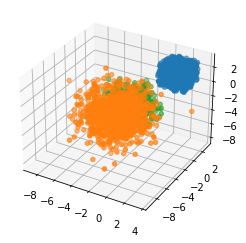

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3453691163.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


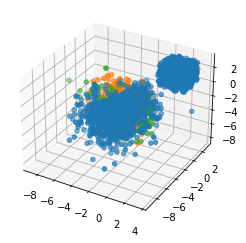

In [377]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in np.unique(labels):
    p = points[labels == i]
    ax.scatter(p.T[0], p.T[1], p.T[2])
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in np.unique(labels):
    # For multi label case
    p = points[np.argmax(preds, axis = 1).flatten() == i]
    
    # For regression case
    #p = points[preds.flatten() == i]
    ax.scatter(p.T[0], p.T[1], p.T[2])
plt.show()

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\1427527491.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


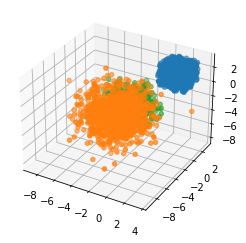

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3413561.py:15: RuntimeWarning: divide by zero encountered in log
  return np.where(x > b, np.log(np.abs(x)), a * x)


(3000, 3)


C:\Users\joels\AppData\Local\Temp\ipykernel_15232\1427527491.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


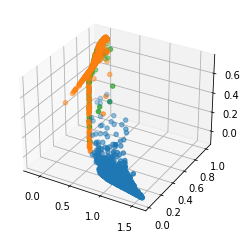

In [378]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in np.unique(labels):
    p = points[labels == i]
    ax.scatter(p.T[0], p.T[1], p.T[2])
plt.show()


preds = []
for i, p in enumerate(points):
    model.predict(p)
    preds.append(np.array(model.layers[-2].signal))
preds = np.array(preds)
print(preds.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in np.unique(labels):
    if len(preds[labels == i]) != 0:
        p = preds[labels == i].reshape(preds[labels == i].shape[0], preds[labels == i].shape[1])
        ax.scatter(p.T[0], p.T[1], p.T[2])
plt.show()

C:\Users\joels\AppData\Local\Temp\ipykernel_15232\3413561.py:15: RuntimeWarning: divide by zero encountered in log
  return np.where(x > b, np.log(np.abs(x)), a * x)


(3000, 3)


C:\Users\joels\AppData\Local\Temp\ipykernel_15232\4172259724.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


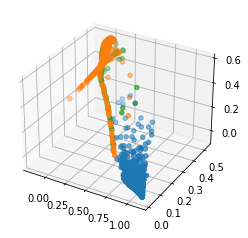

In [379]:
preds = []
for i, p in enumerate(points):
    preds.append(model.predict(p))
preds = np.array(preds).reshape(len(preds), len(preds[0]))

print(preds.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in np.unique(labels):
    p = preds[labels == i]
    ax.scatter(p.T[0], p.T[1], p.T[2])
plt.show()

In [380]:
model.layers[-1].W

array([[           1.222],
       [           0.619],
       [           0.803]])

x = np.multiply(np.random.random_sample((300, inp_size)), np.random.random_integers(0, 5))
y = np.sum(x, axis = 1)
print(x[0].shape, y[0])

model.train(x, y, alpha = 0.003, batch_size= 50, epochs = 10)

for i, j in zip(x, y):
    p = model.predict(i)
    print(p, j, (p-j) * (p-j))

"""
errors = []
for i in range(len(x)):
    pred = model.predict(x[i])
    #print("Model, out_signal:", model.layers[-1].W.dot(np.append(x, 1)))
    print("pred:", pred)
    print("True_", y[i])
    if sum(pred) == 0:
        print(model.layers[-1].gradients)
    
    errors.append(np.sum(model.compute_gradient(x[i], y[i])))
    model.update_layers(alpha = 0.003)
    print()
    #print(model.layers[-1].gradients)
print(np.argmin(errors))
print(y[0])

plt.plot(errors)

plt.show()
"""

In [252]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive']
# Encode all points to the latent representation
def get_latent_space(model, points):
    
    latent_space = []
    
    for p in points:

        latent_space.append(model.predict(p))

    return np.array(latent_space)
    
# Get cluster centres   
def compute_clusters(labels, space):
    
    clusters = []
    num_clusters = len(np.unique(labels))

    if len(clusters) == 0:
        rang = np.arange(len(space))
        np.random.shuffle(rang)

        # Make each cluster the center of all generated points
        for lab in np.unique(labels):

            # Get the points belonging to the label
            labeled_points = space[labels == lab]

            # Take the mean of them and make that the cluster center
            clusters.append(np.mean(labeled_points, axis = 0))
    
    return clusters

def plot_clusters(clusters, colors):
    
    for cluster, color in zip(clusters, colors):
        plt.scatter(cluster[0], cluster[1], color = color)
        
    plt.show()
    
def plot_clasified_points(model, points, labels, colors):
    
    # Calculate latent representation
    latent_space = get_latent_space(model, points)
    
    for lab, color in zip(np.unique(labels), colors):

            # Get the points belonging to the label
        labeled_points = latent_space[labels == lab]

            # plot them
        plt.scatter(labeled_points.T[0], labeled_points.T[1], color = color)

    plt.show()

# Move clusters according to the separation formula
def separate_clusters(clusters, alpha = 5):
    
    moved_clusters = []

    for cluster in clusters:

        movement_sum = 0
        for other_cluster in clusters:

            #dist = alpha * 1/(cluster - other_cluster)
            dist = radial_basis_function(cluster, other_cluster, alpha)*5
            dist[dist == np.Inf] = 0
            movement_sum += dist

        #print(cluster, movement_sum)
        movement_sum = cluster + movement_sum

        moved_clusters.append(movement_sum)


    return np.array(moved_clusters)


In [58]:
# Create data points
size = 100
points = np.random.random_sample((size, 5))
labels = np.random.randint(3, size = size)

print(points[0])

[           0.390            0.282            0.220            0.589            0.232]


In [279]:
# Make the model
np.random.seed(0)
model = Model()
model.add(fullyConnected((4, 5), activation = sigmoid))
model.add(fullyConnected((3, 4), activation = sigmoid))
model.add(fullyConnected((2, 3), activation = sigmoid))

latent_space = get_latent_space(model, points)

clusters = compute_clusters(labels, latent_space)

plt.title("clusters")
plot_clusters(clusters, colors)

cluster_alpha = 0.000001
clusters = separate_clusters(clusters, alpha = cluster_alpha)

plt.title("clusters")
plot_clusters(clusters, colors)

plt.title("latent_space")
plot_clasified_points(model, points, labels, colors)


for i in range(5):
    
    
    clusters = compute_clusters(labels, latent_space)

    clusters = separate_clusters(clusters, alpha = cluster_alpha)
    
    # List of clusters such that the cluster corresponds with the labels
    clusters_ordered = [clusters[y] for y in labels]

    errors = model.train(points, clusters_ordered, epochs = 200, alpha = 0.0003, batch_size= 32, shuffle=False)
    #plot_clasified_points(model, points, labels, colors)
    latent_space = get_latent_space(model, points)

    
plt.title("clusters")
plot_clusters(clusters, colors)
plt.title("points")
plot_clasified_points(model, points, labels, colors)
    

ValueError: shapes (4,6) and (4,) not aligned: 6 (dim 1) != 4 (dim 0)

In [62]:
model = Model()
model.add(Connected_layer((3, 5), activation = tanh))
model.add(Connected_layer((2, 3), activation = tanh))
clusters = []
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive']

# Encode all points to the latent representation
latent_space = []
for p in points:
    
    latent_space.append(model.predict(p))
    
latent_space = np.array(latent_space)

# Get cluster centres (if they dont already exist)
num_clusters = len(np.unique(labels))
    
if len(clusters) == 0:
    rang = np.arange(len(latent_space))
    np.random.shuffle(rang)

    # Make each cluster the center of all generated points
    for lab, color in zip(np.unique(labels), colors):
        
        # Get the points belonging to the label
        labeled_points = latent_space[labels == lab]

        # Take the mean of them and make that the cluster center
        clusters.append(np.mean(labeled_points, axis = 0))
        
        # Scatter them for fun
        plt.scatter(labeled_points.T[0], labeled_points.T[1], color = color)

        
plt.show()
#for j in clusters:
#    plt.scatter(j[0], j[1])
    
#plt.show()
plt.title("initial cluster")
for cluster, color in zip(clusters, colors):
    plt.scatter(cluster[0], cluster[1], color = color)
plt.show()

# Move clusters according to the separation formula
alpha = 5
sums = []

for cluster in clusters:
    
    movement_sum = 0
    for other_cluster in clusters:
        
        dist = alpha * (cluster - other_cluster)
        dist[dist == np.Inf] = 0
        movement_sum += dist
        
    print(cluster, movement_sum)
    movement_sum = cluster + movement_sum
    
    sums.append(movement_sum)

    

clusters = np.array(sums)

plt.title("initial cluster")
for cluster, color in zip(clusters, colors):
    plt.scatter(cluster[0], cluster[1], color = color)
plt.show()

print(clusters)
# Show initial clustering
point_array = get_cluster_belonging(clusters, latent_space)
print("initial")
i = 0
for c, color in zip(point_array, colors):
    if len(c) > 0:
        plt.scatter(np.array(c).T[0], np.array(c).T[1], color = color)
plt.show()

print("####TRAINING####")
# Now, how to update the model?

clusters_ordered = [clusters[y] for y in labels]
for i in range(50):
    
    clusters = []
    # Make each cluster the center of all generated points
    for lab, color in zip(np.unique(labels), colors):
        
        # Get the points belonging to the label
        labeled_points = latent_space[labels == lab]

        # Take the mean of them and make that the cluster center
        clusters.append(np.mean(labeled_points, axis = 0))
        
        # Scatter them for fun
        #plt.scatter(labeled_points.T[0], labeled_points.T[1], color = color)
    
    sums = []

    for cluster in clusters:

        movement_sum = 0
        for other_cluster in clusters:

            dist = alpha * (cluster - other_cluster)
            dist[dist == np.Inf] = 0
            movement_sum += dist

        print(cluster, movement_sum)
        movement_sum = cluster + movement_sum

        sums.append(movement_sum)



    clusters = np.array(sums)
    
    for epochs in range(40):
        
        
        errors = model.batch_update(points, clusters_ordered, alpha = 0.03)
        
    #print(errors)
        #for x, y in zip(points, labels):

            

    latent_space = []
    # Show initial clustering
    for p in points:
    
        latent_space.append(model.predict(p))
    
    latent_space = np.array(latent_space)
    
    point_array = get_cluster_belonging(clusters, latent_space)
    print("Epoch", i)
    i = 0
    for c, color in zip(point_array, colors):
        if len(c) > 0:
            plt.scatter(np.array(c).T[0], np.array(c).T[1], color = color)
    plt.show()
    

    


NameError: name 'Connected_layer' is not defined

Latent Space:


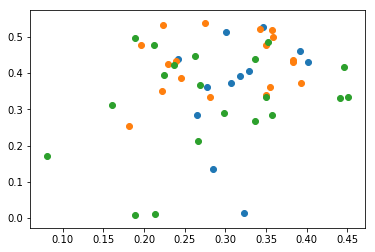

In [172]:
print("Latent Space:")
plot_clasified_points(model, points, labels, colors)

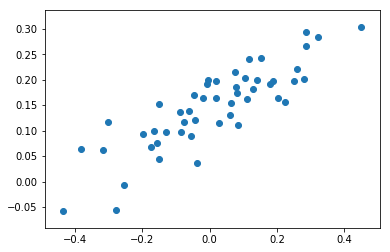

In [116]:
plt.scatter(np.array(latent_space).T[0], np.array(latent_space).T[1])
plt.show()

In [117]:
def one_hot_encode(x, num_classes = 6):
    ret = []
    for i in x:
        arr = [0 for i in range(num_classes)]
        arr[i] = 1
        ret.append(np.array(arr))
    ret = np.array(ret)
    return ret
encoded_labels = one_hot_encode(labels, num_classes = 3)

In [63]:
encoded_labels

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [165]:
model = Model()
model.add(Connected_layer((4, 5), activation = tanh))
#model.add(Connected_layer((10, 10), activation = tanh))
model.add(Connected_layer((3, 4), activation = tanh))

model.train(points, encoded_labels, epochs=300, alpha = 0.007, batch_size= 16, shuffle=True)

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50
epoch: 51
epoch: 52
epoch: 53
epoch: 54
epoch: 55
epoch: 56
epoch: 57
epoch: 58
epoch: 59
epoch: 60
epoch: 61
epoch: 62
epoch: 63
epoch: 64
epoch: 65
epoch: 66
epoch: 67
epoch: 68
epoch: 69
epoch: 70
epoch: 71
epoch: 72
epoch: 73
epoch: 74
epoch: 75
epoch: 76
epoch: 77
epoch: 78
epoch: 79
epoch: 80
epoch: 81
epoch: 82
epoch: 83
epoch: 84
epoch: 85
epoch: 86
epoch: 87
epoch: 88
epoch: 89
epoch: 90
epoch: 91
epoch: 92
epoch: 93
epoch: 94
epoch: 95
epoch: 96
epoch: 97
epoch: 98
epoch: 99
epoch: 100

In [166]:
acc = 0
for p, l in zip(points, labels):

    pred = model.predict(p)
    
    if np.argmax(pred) == l: 
        acc += 1

        
print(acc/ len(points))

0.46


In [278]:
def d(x):
    return x + 1

list(map(d, [1]))

[2]

In [233]:
a = [0, 1, 2, 3]
b = [7, 7, 7, 7]
np.where(np.array(a) > 2, b, 0)

array([0, 0, 0, 7])